In [104]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sb
import pylab
import chart_studio.plotly as py
import plotly.graph_objs as go

In [78]:
train=pd.read_csv('PCA_data.csv', index_col='Year')

In [79]:
train.describe()

,C1,C2,C3,C4,C5,C6,C7
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,145.000000,51.300000,151.60000,43.900000,22.950000,19.200000,36.550000
std,71.830942,39.127457,102.72672,32.119678,13.465257,10.133841,18.305809
min,76.000000,13.000000,31.00000,7.000000,7.000000,6.000000,15.000000
25%,89.000000,20.750000,62.75000,16.250000,11.000000,9.750000,19.750000
50%,112.000000,36.500000,132.50000,36.000000,18.000000,19.500000,31.000000
75%,188.000000,73.000000,245.75000,68.000000,37.000000,28.250000,51.500000
max,299.000000,136.000000,319.00000,106.000000,46.000000,34.000000,73.000000


In [80]:
train.head()

,C1,C2,C3,C4,C5,C6,C7
Year,,,,,,,
1967,76,13,31,7,7,6,15
1968,88,14,34,10,8,7,19
1969,89,16,38,12,8,6,17
1970,89,18,44,13,9,7,19
1971,88,20,56,14,11,9,18


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1967 to 1986
Data columns (total 7 columns):
C1    20 non-null int64
C2    20 non-null int64
C3    20 non-null int64
C4    20 non-null int64
C5    20 non-null int64
C6    20 non-null int64
C7    20 non-null int64
dtypes: int64(7)
memory usage: 1.2 KB


In [82]:
train.index

Int64Index([1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
            1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986],
           dtype='int64', name='Year')

In [83]:
# data looks good
train.isnull().sum()[train.isnull().sum() != 0]

Series([], dtype: int64)

In [84]:
# 1. What is the sample correlation matrix for these data
train.shape

(20, 7)

In [85]:
# calculate sample covariance matrix first, given by 
# # Q = 1/(n-1) (X')^TX'
n = train.shape[0]
p = train.shape[1]
sample_mean = np.mean(train, axis=0)
X_centered = train - sample_mean
X_centered

,C1,C2,C3,C4,C5,C6,C7
Year,,,,,,,
1967,-69.0,-38.3,-120.6,-36.9,-15.95,-13.2,-21.55
1968,-57.0,-37.3,-117.6,-33.9,-14.95,-12.2,-17.55
1969,-56.0,-35.3,-113.6,-31.9,-14.95,-13.2,-19.55
1970,-56.0,-33.3,-107.6,-30.9,-13.95,-12.2,-17.55
1971,-57.0,-31.3,-95.6,-29.9,-11.95,-10.2,-18.55
1972,-56.0,-30.3,-86.6,-26.9,-11.95,-9.2,-13.55
1973,-57.0,-28.3,-78.6,-25.9,-9.95,-9.2,-16.55
1974,-53.0,-23.3,-67.6,-21.9,-9.95,-7.2,-12.55
1975,-41.0,-20.3,-42.6,-15.9,-6.95,-4.2,-10.55


In [86]:
# the sample covariance matrix Q:
Q = 1/(n-1)*np.dot(X_centered.T, X_centered)
Q

array([[ 5159.68421053,  2794.15789474,  7122.10526316,  2268.47368421,
          817.68421053,   566.63157895,  1262.31578947],
       [ 2794.15789474,  1530.95789474,  3874.70526316,  1239.03157895,
          440.85789474,   312.93684211,   686.98421053],
       [ 7122.10526316,  3874.70526316, 10552.77894737,  3273.95789474,
         1294.03157895,   929.82105263,  1844.02105263],
       [ 2268.47368421,  1239.03157895,  3273.95789474,  1031.67368421,
          390.99473684,   283.91578947,   580.42631579],
       [  817.68421053,   440.85789474,  1294.03157895,   390.99473684,
          181.31315789,   129.90526316,   224.81842105],
       [  566.63157895,   312.93684211,   929.82105263,   283.91578947,
          129.90526316,   102.69473684,   166.30526316],
       [ 1262.31578947,   686.98421053,  1844.02105263,   580.42631579,
          224.81842105,   166.30526316,   335.10263158]])

In [87]:
# doulbe check with np version
X = np.matrix(train) #Dataset in the matrix form
X_dm = X - np.mean(X,axis =0)#Normalise the data set to make it with zero mean acroos the tenors
Cov_X = np.cov(X_dm, rowvar = False)#Calculate the covariance matrix
Cov_X

array([[ 5159.68421053,  2794.15789474,  7122.10526316,  2268.47368421,
          817.68421053,   566.63157895,  1262.31578947],
       [ 2794.15789474,  1530.95789474,  3874.70526316,  1239.03157895,
          440.85789474,   312.93684211,   686.98421053],
       [ 7122.10526316,  3874.70526316, 10552.77894737,  3273.95789474,
         1294.03157895,   929.82105263,  1844.02105263],
       [ 2268.47368421,  1239.03157895,  3273.95789474,  1031.67368421,
          390.99473684,   283.91578947,   580.42631579],
       [  817.68421053,   440.85789474,  1294.03157895,   390.99473684,
          181.31315789,   129.90526316,   224.81842105],
       [  566.63157895,   312.93684211,   929.82105263,   283.91578947,
          129.90526316,   102.69473684,   166.30526316],
       [ 1262.31578947,   686.98421053,  1844.02105263,   580.42631579,
          224.81842105,   166.30526316,   335.10263158]])

In [88]:
Cov_X

array([[ 5159.68421053,  2794.15789474,  7122.10526316,  2268.47368421,
          817.68421053,   566.63157895,  1262.31578947],
       [ 2794.15789474,  1530.95789474,  3874.70526316,  1239.03157895,
          440.85789474,   312.93684211,   686.98421053],
       [ 7122.10526316,  3874.70526316, 10552.77894737,  3273.95789474,
         1294.03157895,   929.82105263,  1844.02105263],
       [ 2268.47368421,  1239.03157895,  3273.95789474,  1031.67368421,
          390.99473684,   283.91578947,   580.42631579],
       [  817.68421053,   440.85789474,  1294.03157895,   390.99473684,
          181.31315789,   129.90526316,   224.81842105],
       [  566.63157895,   312.93684211,   929.82105263,   283.91578947,
          129.90526316,   102.69473684,   166.30526316],
       [ 1262.31578947,   686.98421053,  1844.02105263,   580.42631579,
          224.81842105,   166.30526316,   335.10263158]])

In [89]:
# double check again with sklearn PCA
pca = PCA(n_components=p);
pca.fit(train)
# get_covariance gives us the sample covariance matrix
pca.get_covariance()

array([[ 5159.68421053,  2794.15789474,  7122.10526316,  2268.47368421,
          817.68421053,   566.63157895,  1262.31578947],
       [ 2794.15789474,  1530.95789474,  3874.70526316,  1239.03157895,
          440.85789474,   312.93684211,   686.98421053],
       [ 7122.10526316,  3874.70526316, 10552.77894737,  3273.95789474,
         1294.03157895,   929.82105263,  1844.02105263],
       [ 2268.47368421,  1239.03157895,  3273.95789474,  1031.67368421,
          390.99473684,   283.91578947,   580.42631579],
       [  817.68421053,   440.85789474,  1294.03157895,   390.99473684,
          181.31315789,   129.90526316,   224.81842105],
       [  566.63157895,   312.93684211,   929.82105263,   283.91578947,
          129.90526316,   102.69473684,   166.30526316],
       [ 1262.31578947,   686.98421053,  1844.02105263,   580.42631579,
          224.81842105,   166.30526316,   335.10263158]])

In [90]:
# now calculate the sample correlation matrix given by
# Cor[train] = (Q^(diag))^-1/2 Q (Q^(diag))^-1/2
Q_diag = np.zeros(Q.shape)
np.fill_diagonal(Q_diag, np.diagonal(Q))
Q_diag_sqrt = np.sqrt(Q_diag)
Q_diag_sqrt_inv = np.linalg.inv(Q_diag_sqrt)
sample_corr_matrix = np.dot(np.dot(Q_diag_sqrt_inv, Q), Q_diag_sqrt_inv)
sample_corr_matrix

array([[1.        , 0.99416337, 0.96519132, 0.98322069, 0.84539444,
        0.77842203, 0.95999182],
       [0.99416337, 1.        , 0.96399244, 0.98589253, 0.83676275,
        0.78922526, 0.95912721],
       [0.96519132, 0.96399244, 1.        , 0.99224403, 0.93550647,
        0.89318591, 0.98060372],
       [0.98322069, 0.98589253, 0.99224403, 1.        , 0.90403464,
        0.87225662, 0.98715875],
       [0.84539444, 0.83676275, 0.93550647, 0.90403464, 1.        ,
        0.95200229, 0.9120703 ],
       [0.77842203, 0.78922526, 0.89318591, 0.87225662, 0.95200229,
        1.        , 0.89648491],
       [0.95999182, 0.95912721, 0.98060372, 0.98715875, 0.9120703 ,
        0.89648491, 1.        ]])

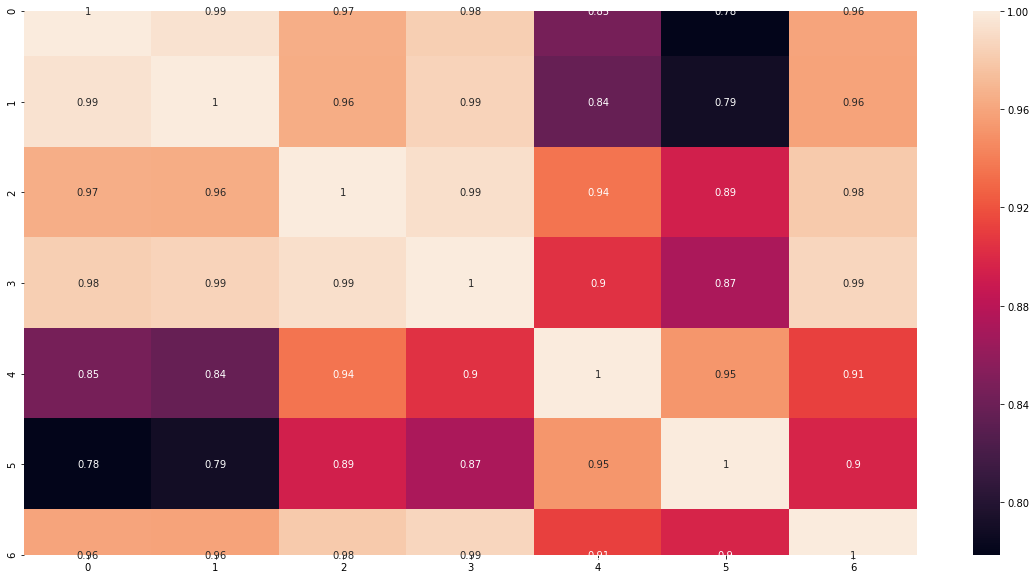

In [91]:
plt.figure(figsize=(20,10))
sb.heatmap(sample_corr_matrix,annot=True)

In [92]:
# 2. Perform PCA on that correlation matrix. What percentage of total variability is 
# accounted for by the first principal component?
n = sample_corr_matrix.shape[0]
p = sample_corr_matrix.shape[1]
pca = PCA(n_components=p);
pca.fit(sample_corr_matrix)
print('n_features_:', pca.n_features_)
print('n_components_:', pca.n_components_)

n_features_: 7
n_components_: 7


In [93]:
pca.explained_variance_

array([2.63315235e-02, 2.80170922e-03, 4.68348552e-04, 4.33894403e-05,
       4.57034983e-06, 7.32733963e-07, 9.55111938e-35])

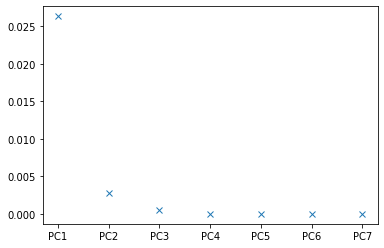

In [94]:
pylab.plot(pca.explained_variance_, 'x')
pylab.xticks(range(p), ['PC' + str(i) for i in range(1, p+1)]);

[88.81, 9.45, 1.58, 0.15, 0.02, 0.0, 0.0]


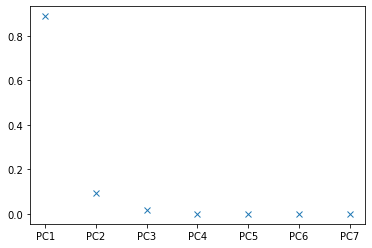

In [95]:
pylab.plot([x / sum(pca.explained_variance_) for x in pca.explained_variance_], 'x')
print([round(x / sum(pca.explained_variance_) * 100, 2) for x in pca.explained_variance_])
pylab.xticks(range(p), ['PC' + str(i) for i in range(1, p+1)]);

From this we can see that the total variability accounted for by PC1 is about 89%.

In [109]:
# 3. How would you interpret that principal component, what does it represent?
# first, visualize the sample correlation matrix 
Z = pca.transform(sample_corr_matrix); Z.shape


(7, 7)

In [110]:
trace = go.Heatmap(z=pca.components_.T,
                   x = ['PC' + str(i) for i in range(1, np.shape(Z)[1] + 1)],
                   y=['corr_' + str(c) for c in range(1, sample_corr_matrix.shape[1] + 1)])
data=[trace]
py.iplot(data, filename='basic-heatmap')

In [112]:
corrmatrix = np.corrcoef(sample_corr_matrix.T, Z.T)

In [113]:
# show the sample correlation matrix along with the principal components in one correlation matrix
labels = ['corr_' + str(c) for c in range(1, sample_corr_matrix.shape[1] + 1)]
labels.extend(['PC' + str(i) for i in range(1, np.shape(Z)[1] + 1)])

trace = go.Heatmap(z=corrmatrix, x=labels, y=labels)
data=[trace]
py.iplot(data, filename='basic-heatmap')

3. How would you interpret that principal component, what does it represent?
the PC1 is strongly negatively correlated with the first 4 components and the last of the sample correlation matrix, as well as strongly positively correlated with the 5th and 6th component. PC1 is strongly correlated with all components of the correlation matrix, which reflects the fact that it explains almost 89% of the variance of the sample correlation matrix.
(It is not quite clear to me whether the components of the sample correlation matrix still represent the original C category groupings from the original data..)

4. What percentage of total variability is accounted for by the second principal component?
PC2 accounts for 9.5% of the variability of the sample correlation matrix as observed in the chart above.

5. How would you interpret that principal component, what does it represent?
PC2 does not significantly correlate with components 1 and 2 (and C1, C2, respectively?). However, it positively and quite strongly correlates with all the other components.

In [124]:
# 6. Replace the features C1, . . . ,C7 with the corresponding proportions. What is the resulting data table?

train_prop = train.copy()
# per row, divide each element by the sum of the row
train_prop = train_prop.div(train_prop.sum(axis=1), axis=0)
train_prop

,C1,C2,C3,C4,C5,C6,C7
Year,,,,,,,
1967,0.490323,0.083871,0.200000,0.045161,0.045161,0.038710,0.096774
1968,0.488889,0.077778,0.188889,0.055556,0.044444,0.038889,0.105556
1969,0.478495,0.086022,0.204301,0.064516,0.043011,0.032258,0.091398
1970,0.447236,0.090452,0.221106,0.065327,0.045226,0.035176,0.095477
1971,0.407407,0.092593,0.259259,0.064815,0.050926,0.041667,0.083333
1972,0.377119,0.088983,0.275424,0.072034,0.046610,0.042373,0.097458
1973,0.359184,0.093878,0.297959,0.073469,0.053061,0.040816,0.081633
1974,0.334545,0.101818,0.305455,0.080000,0.047273,0.043636,0.087273
1975,0.316109,0.094225,0.331307,0.085106,0.048632,0.045593,0.079027


In [153]:
# 7. Apply the transformation (2) to the data. What is the resulting data table?
from numpy import log as ln

train_transform = pd.DataFrame(columns=train.columns, index=train.index)
for index, row in train.iterrows():
    # apply formula (2) to each value of data value X_{ij}^*
    sum_ln = row.apply(lambda x: ln(x)).sum() / len(train.columns)
    row_transform = row.apply(lambda x: ln(x) - sum_ln)
    train_transform.loc[index] = row_transform

train_transform

,C1,C2,C3,C4,C5,C6,C7
Year,,,,,,,
1967,1.65626,-0.109522,0.759516,-0.728561,-0.728561,-0.882712,0.0335788
1968,1.63232,-0.205961,0.681342,-0.542434,-0.765577,-0.899108,0.0994203
1969,1.6189,-0.0971445,0.767853,-0.384827,-0.790292,-1.07797,-0.0365198
1970,1.51496,-0.0833026,0.810515,-0.408725,-0.77645,-1.02776,-0.0292354
1971,1.38834,-0.0932634,0.936356,-0.449938,-0.6911,-0.891771,-0.198624
1972,1.29196,-0.152154,0.977711,-0.363463,-0.798781,-0.894091,-0.0611821
1973,1.24063,-0.10121,1.05376,-0.346332,-0.671755,-0.934119,-0.240972
1974,1.14982,-0.0397615,1.05885,-0.280924,-0.807017,-0.887059,-0.193912
1975,1.09572,-0.114679,1.14268,-0.216462,-0.776078,-0.840616,-0.29057


In [157]:
# 8. What is the sample covariance matrix for these (transformed) data?

# according to the definition of Q:
# # Q = 1/(n-1) (X')^TX'
# let's center the transformed data first to obtain X':
n = train_transform.shape[0]
p = train_transform.shape[1]
sample_mean = np.mean(train_transform, axis=0)
X_centered = train_transform - sample_mean
X_centered

# now, the sample covariance matrix Q is:
Q_transform = 1/(n-1)*np.dot(X_centered.T, X_centered)
Q_transform


array([[0.07192485710154495, -0.00800100610733325, -0.039284799016458385,
        -0.04492577847280772, -0.004595437724536555,
        -0.012182777613086653, 0.03706494183267763],
       [-0.00800100610733325, 0.023621198843403655, 0.01179368836724956,
        0.01941827227100971, -0.012366240924746197,
        -0.021507422248614048, -0.012958490200969435],
       [-0.039284799016458385, 0.01179368836724956, 0.02793175531548807,
        0.029691669304533708, -0.0020775307190331604,
        -0.0029783575677639436, -0.025076425684015906],
       [-0.04492577847280772, 0.01941827227100971, 0.029691669304533708,
        0.04129898222964777, -0.007667628364727107,
        -0.009311122593023488, -0.028504394374632865],
       [-0.004595437724536555, -0.012366240924746197,
        -0.0020775307190331604, -0.007667628364727107,
        0.01558230781507618, 0.01192046628142841, -0.0007959363634615569],
       [-0.012182777613086653, -0.021507422248614048,
        -0.0029783575677639436, -0.0093

In [158]:
# 9. Perform PCA on this covariance matrix and interpret the first three principal components.

n = Q_transform.shape[0]
p = Q_transform.shape[1]
pca = PCA(n_components=p);
pca.fit(Q_transform)
print('n_features_:', pca.n_features_)
print('n_components_:', pca.n_components_)

n_features_: 7
n_components_: 7


In [159]:
pca.explained_variance_

array([4.04229183e-03, 6.53447052e-04, 1.98299518e-05, 2.27563581e-06,
       1.69644022e-06, 3.87361343e-07, 1.22165399e-36])

[85.64, 13.84, 0.42, 0.05, 0.04, 0.01, 0.0]


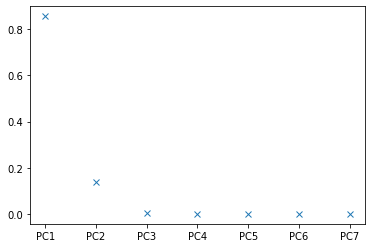

In [171]:
pylab.plot([x / sum(pca.explained_variance_) for x in pca.explained_variance_], 'x')
print([round(x / sum(pca.explained_variance_) * 100, 2) for x in pca.explained_variance_])
pylab.xticks(range(p), ['PC' + str(i) for i in range(1, p+1)]);

From this plot we see that PC1 explains about 86%, PC2 about 14% and PC3 about 0.5% of the total variability of the underlying data, i.e. the sample covariance matrix of the transformed data.

In [172]:
Z = pca.transform(Q_transform); Z.shape

(7, 7)

In [185]:
trace = go.Heatmap(z=pca.components_.T,
                   x = ['PC' + str(i) for i in range(1, np.shape(Z)[1] + 1)],
                   y=['cov_' + str(c) for c in range(1, Q_transform.shape[1] + 1)])
data=[trace]
py.iplot(data, filename='basic-heatmap')

From this matrix we can see that each covariance feature can be well explained by the first three principal components:
cov_1:  PC1, 0.63
cov_2:  PC2, -0.51
cov_3:  PC1, -0.40
cov_4:  PC1, -0.49
cov_5:  PC3, 0.78
cov_6:  PC2, 0.67
cov_7:  PC1, 0.39 or PC3, -0.40

However, relating these features from the sample covariance matrix back to the original features C1-C7, we could say that (I am not completely sure whether this link that I am making here is valid):
PC1 shows there is a positive correlation with C1, C6 (and C7) as well as a negative correlation with C3 and C4, and explains the variability thereof. 
PC2 shows there is a negative correlation with C2 (Interest on National Debt) and C6 (Education and Manpower).
PC3 explains the variability of C5 and C7 and has a negative correlation with them.